In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import seaborn as sns

# Data analysis

In [78]:
import os
print(os.listdir('..\\lab1'))

['lab1.ipynb', 'Online Retail.xlsx']


In [79]:
df = pd.read_excel('..\\lab1\\Online Retail.xlsx')

In [80]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [81]:
df.shape

(541909, 8)

In [82]:
country_cust_df = df[['Country', 'CustomerID']].drop_duplicates()

In [83]:
df.shape

(541909, 8)

In [84]:
country_cust_df = df[['Country', 'CustomerID']].dropna()

In [85]:
df.shape

(541909, 8)

In [86]:
country_cust_df.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values(['CustomerID'], ascending = False)

,Country,CustomerID
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533
23,Netherlands,2371
3,Belgium,2069
32,Switzerland,1877
26,Portugal,1480
0,Australia,1259


# Group data

In [87]:
# Групуємо клієнтів за країною
df = df[df['Country'] == 'United Kingdom']

# Видаляємо рядки з нульовими значеннями в стовпцях Description і CustomerID
df = df.dropna(subset=['Description', 'CustomerID'])

# Видаляємо негативні записи в кількості
df = df[df['Quantity'] >= 0]

# Перетворюємо Invoice_Date у формат дати і часу
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Додаємо новий стовпець Total_Amount
df['Total_Amount'] = df['Quantity'] * df['UnitPrice']

# Виведемо перші декілька рядків для перевірки
print(df.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  


In [88]:
df.shape

(354345, 9)

In [178]:
import datetime as dt

# allocate the end date of data
last_date = df['InvoiceDate'].max()

# create rfm dataframe group by customer
RFM_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max() + datetime.timedelta(days=1)).days,
    'InvoiceNo': lambda x: len(x),  # F (Frequency)
    'Total_Amount': 'sum'  # M (Monetary Value)
}).reset_index()

# set the true name of columns
RFM_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(RFM_data.head(5))


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12747.0        2        103   4196.01
2     12748.0        1       4596  33719.73
3     12749.0        4        199   4090.88
4     12820.0        3         59    942.34


In [158]:
RFM_data.shape

(3921, 4)

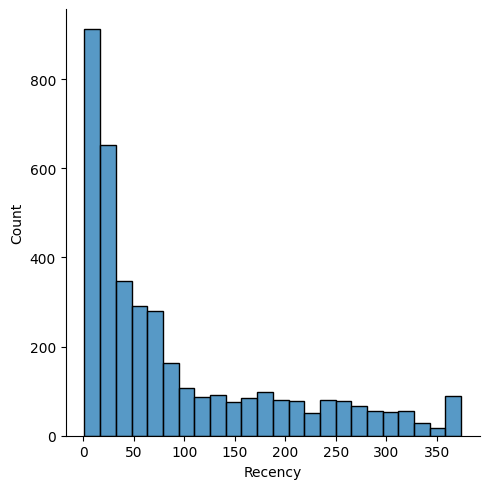

In [179]:
x = RFM_data['Recency']
ax = sns.displot(x)
plt.show()

In [189]:
RFM_data['R'] = RFM_data['Recency'].apply(math.log)
RFM_data['F'] = RFM_data['Frequency'].apply(math.log)
RFM_data['M'] = RFM_data['Monetary'].apply(lambda x: math.log(x + 1))

In [190]:
RFM_data.head(3)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,1,77183.60,5.786897,0.000000,11.253955
1,12747.0,2,103,4196.01,0.693147,4.634729,8.342128
2,12748.0,1,4596,33719.73,0.000000,8.432942,10.425868


# Data preprocessing

In [192]:
from sklearn.preprocessing import StandardScaler

feature_vector=['R','F','M']
X = RFM_data[feature_vector].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

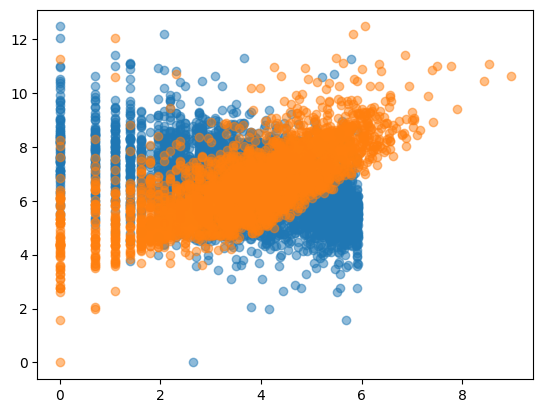

In [193]:
plt.scatter(RFM_data.R,RFM_data.M,alpha=0.5)

plt.scatter(RFM_data.F,RFM_data.M,alpha=0.5)

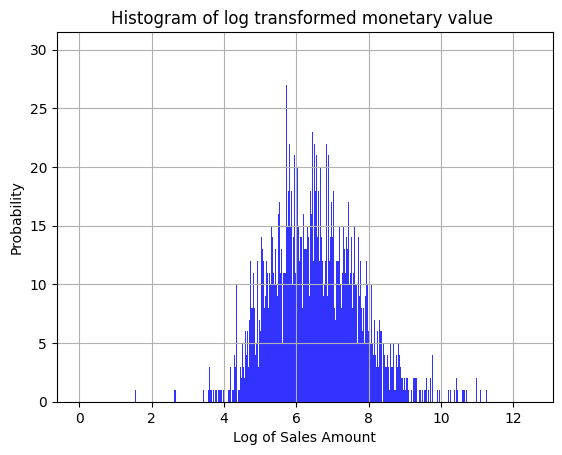

In [194]:
x=RFM_data.M
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=0.8)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title('Histogram of log transformed monetary value ')
plt.grid(True)
plt.show()

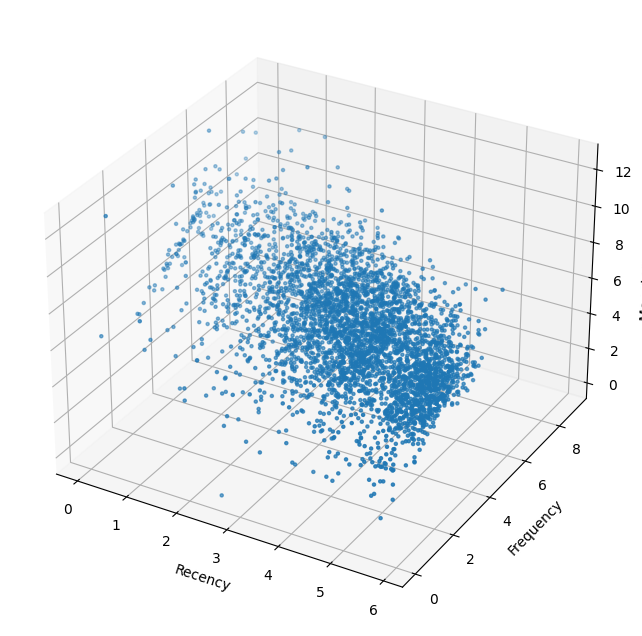

In [200]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
xs = RFM_data.R
ys = RFM_data.F
zs = RFM_data.M
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# KMeans algorithm

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yura\AppData\Local\Temp\ipykernel_11492\2066633019.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


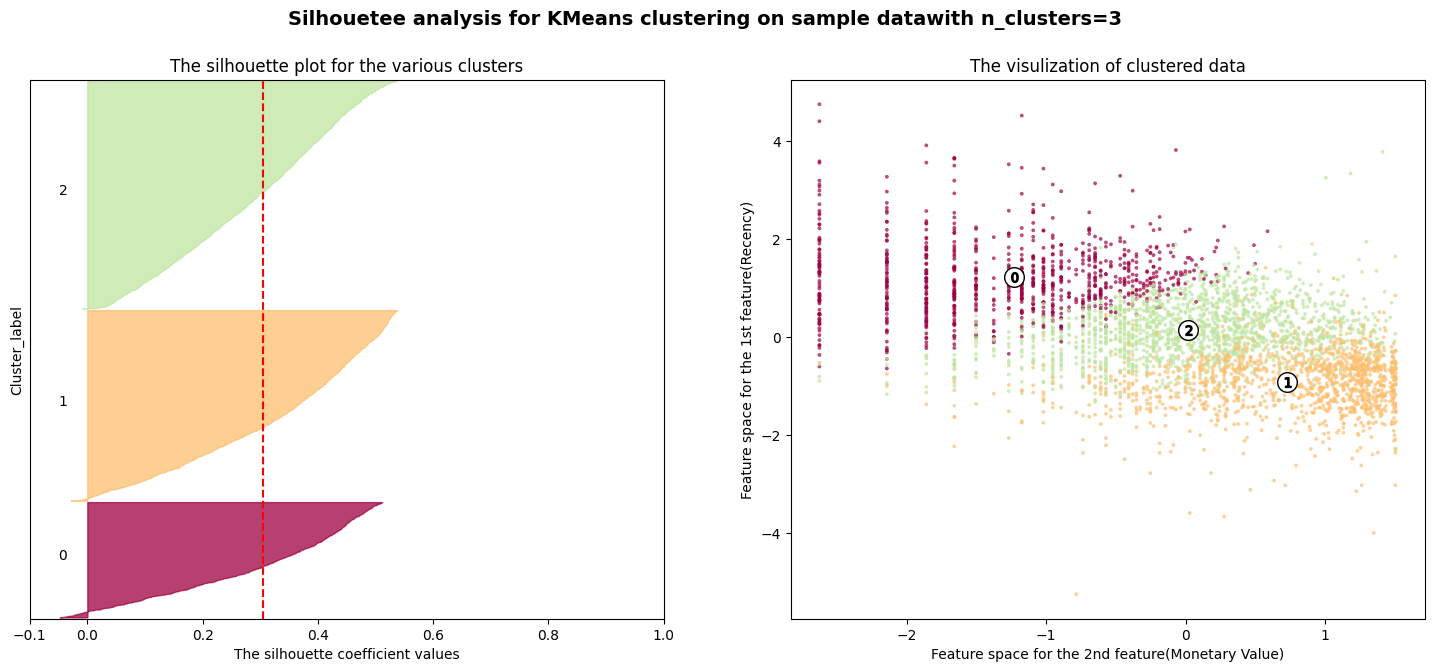

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yura\AppData\Local\Temp\ipykernel_11492\2066633019.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


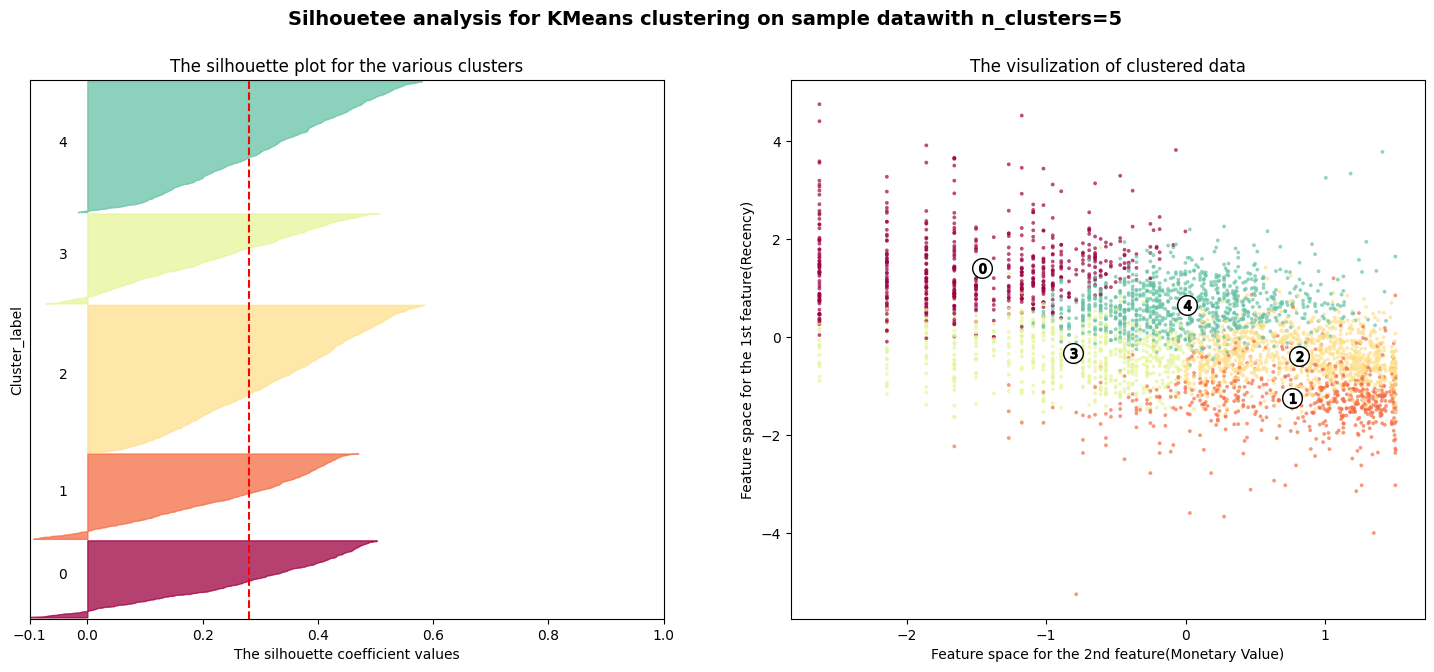

In [205]:
# Importing necessary libraries
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming X_scaled is your data after scaling
X = X_scaled

# Dictionary to store cluster centers and silhouette scores
cluster_centers = dict()

# Loop over a range of cluster numbers (3, 5) with a step size of 2
for n_clusters in range(3, 6, 2):

    # Creating a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Creating a KMeans clusterer with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculating the average silhouette score for the clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters: {'cluster_centre': clusterer.cluster_centers_,
                                         'silhouette_score': silhouette_avg,
                                         'labels': cluster_labels}
                            })

    # Calculating silhouette values for individual samples in each cluster
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    # Looping through clusters to create silhouette plots
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Assigning colors based on clusters for the silhouette plot
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.75)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for 0 samples

    # Setting titles and labels for the silhouette plot
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster_label')
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter plot to visualize the clustered data in feature space
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30,
                lw=0, alpha=0.7, edgecolor='k', c=colors)
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker="o",
                alpha=1, c='white', s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    edgecolor='k', s=50)

    # Setting titles and labels for the scatter plot
    ax2.set_title('The visulization of clustered data')
    ax2.set_xlabel('Feature space for the 2nd feature(Monetary Value)')
    ax2.set_ylabel('Feature space for the 1st feature(Recency)')

    # Adding a main title to the figure
    plt.suptitle('Silhouetee analysis for KMeans clustering on sample data'
                 'with n_clusters=%d' % n_clusters, fontsize=14, fontweight='bold')

    # Displaying the figure
    plt.show()


C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yura\AppData\Local\Temp\ipykernel_11492\1407530821.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


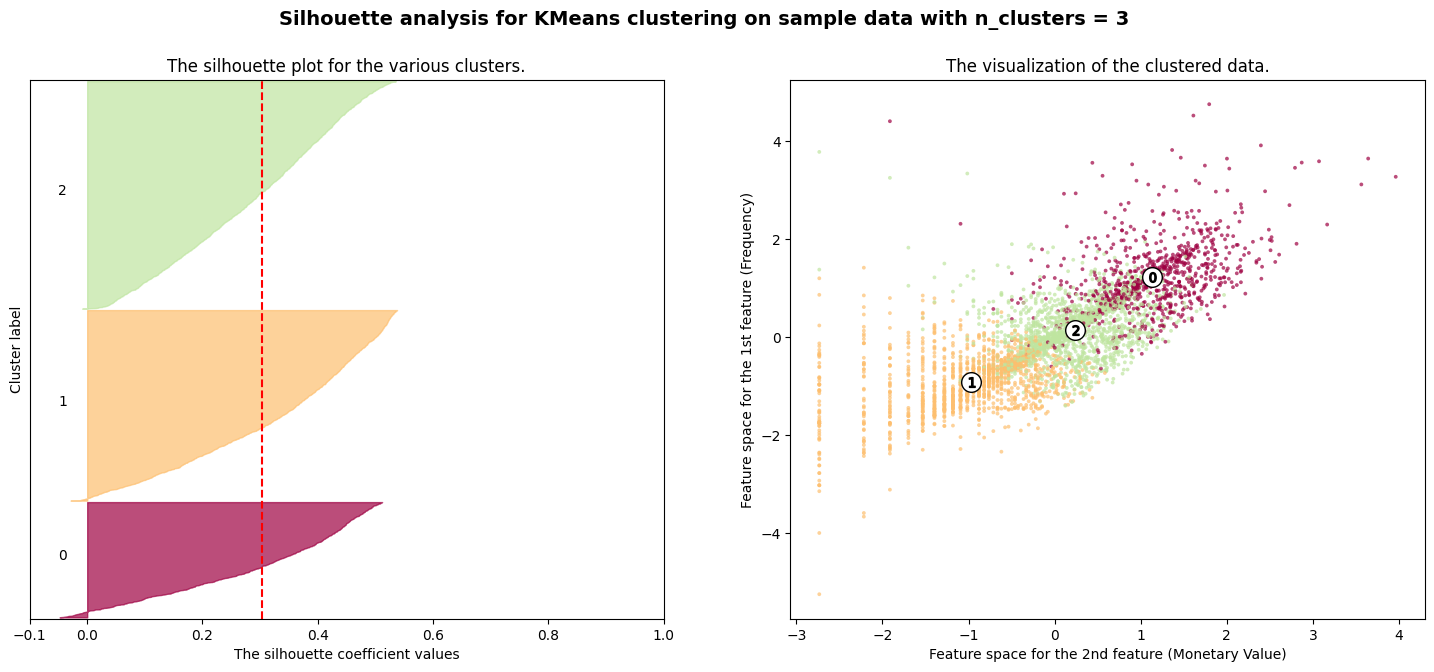

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yura\AppData\Local\Temp\ipykernel_11492\1407530821.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


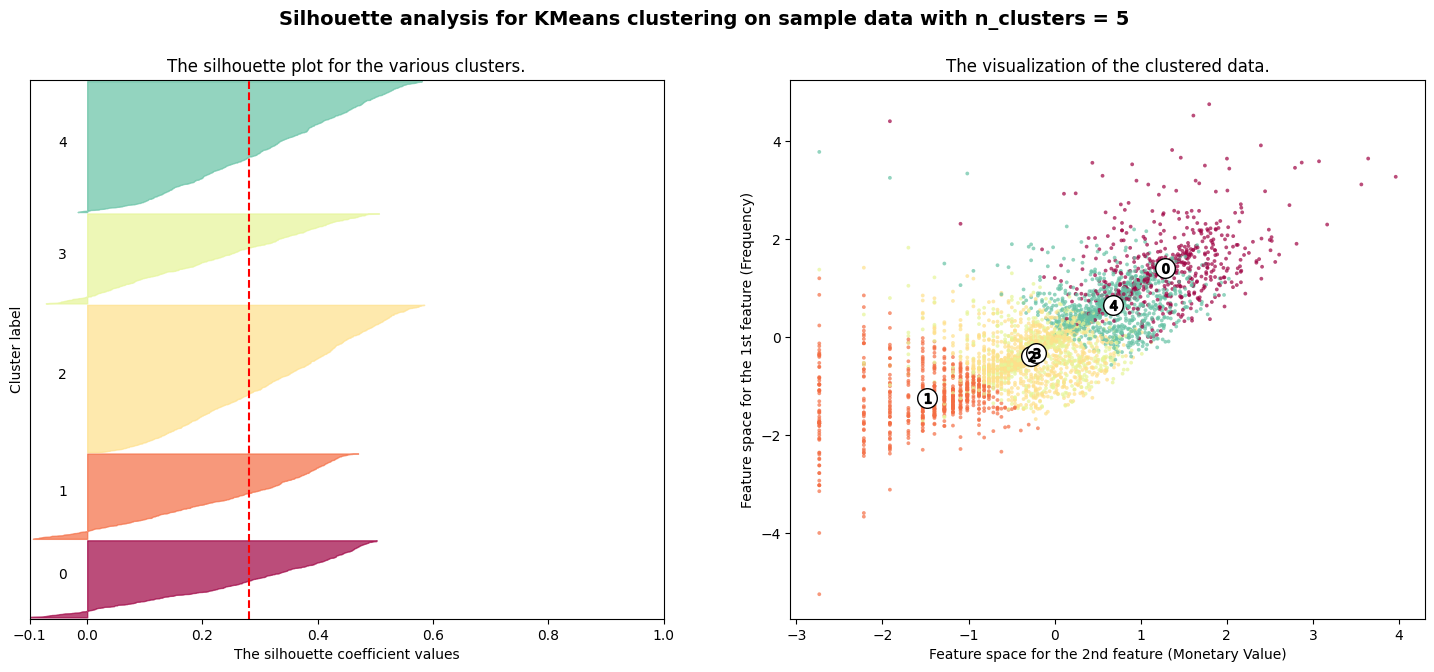

In [206]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Assuming X_scaled is your data after scaling
X = X_scaled

# Dictionary to store cluster centers and silhouette scores
cluster_centers = dict()

# Loop over a range of cluster numbers (3, 5) with a step size of 2
for n_clusters in range(3, 6, 2):

    # Creating a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Creating a KMeans clusterer with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculating the average silhouette score for the clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters: {
        'cluster_center': clusterer.cluster_centers_,
        'silhouette_score': silhouette_avg,
        'labels': cluster_labels}
    })

    # Calculating silhouette values for individual samples in each cluster
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    # Looping through clusters to create silhouette plots
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Assigning colors based on clusters for the silhouette plot
        cmap = cm.get_cmap('Spectral')
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting titles and labels for the silhouette plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter plot to visualize the clustered data in feature space
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 1
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Adding cluster centers to the scatter plot
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    # Setting titles and labels for the scatter plot
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 2nd feature (Monetary Value)")
    ax2.set_ylabel("Feature space for the 1st feature (Frequency)")

    # Adding a main title to the figure
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Displaying the figure
    plt.show()


# Results

In [203]:
for i in range(3,6,2):
    print('for {} number of clusters'.format(i))
    cent_transformed=scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print('Silhouette score for cluster {} is {}'.format(i,cluster_centers[i]['silhouette_score']))

for 3 number of clusters
            R           F            M
0    7.389550  177.228707  3162.660036
1  122.280912   10.630599   223.081359
2   44.097232   53.344772   834.299902
Silhouette score for cluster 3 is 0.30401212719429843
for 5 number of clusters
            R           F            M
0    5.328002  217.268627  4054.787143
1  127.991199    5.355295   148.311359
2  137.983088   26.757086   426.069510
3   13.494030   29.091710   460.221371
4   43.628449   95.885000  1553.915789
Silhouette score for cluster 5 is 0.27999288454995064


# Results graph

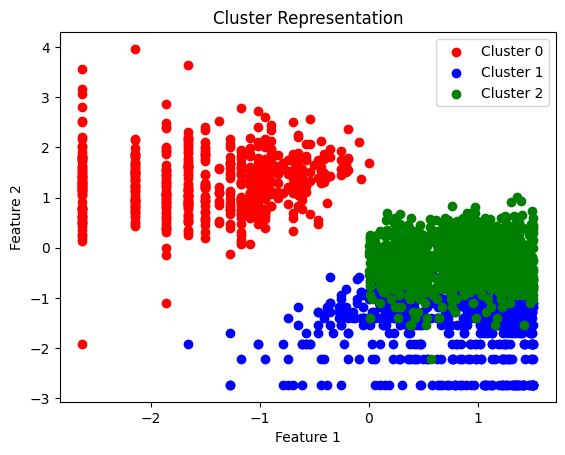

In [209]:
# Assuming 'X' contains your data points and 'cluster_labels' contains the cluster assignments

# Scatter plot for cluster 0
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], c='red', label='Cluster 0')

# Scatter plot for cluster 1
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], c='blue', label='Cluster 1')

# Scatter plot for cluster 2
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], c='green', label='Cluster 2')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Representation')
plt.legend()
plt.show()
